In [1]:
import numpy as np
import geatpy as ea
from matplotlib import pyplot as plt

In [31]:
class UF1(ea.Problem):  # 继承Problem父类
    def __init__(self):
        name = 'UF1'  # 初始化name（函数名称，可以随意设置）
        M = 2  # 初始化M（目标维数）
        maxormins = [1] * M  # 初始化maxormins（目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标）
        Dim = 30  # 初始化Dim（决策变量维数）
        varTypes = [0] * Dim  # 初始化varTypes（决策变量的类型，0：实数；1：整数）
        lb = [0] + [-1] * (Dim - 1)  # 决策变量下界
        ub = [1] * Dim  # 决策变量上界
        lbin = [1] * Dim  # 决策变量下边界（0表示不包含该变量的下边界，1表示包含）
        ubin = [1] * Dim  # 决策变量上边界（0表示不包含该变量的上边界，1表示包含）
        # 调用父类构造方法完成实例化
        ea.Problem.__init__(self, name, M, maxormins, Dim, varTypes, lb, ub, lbin, ubin)

    def aimFunc(self, pop):  # 目标函数
        Vars = pop.Phen  # 得到决策变量矩阵
        x1 = Vars[:, [0]]
        J1 = np.arange(2, self.Dim, 2)
        J2 = np.arange(1, self.Dim, 2)
        tmp = 6 * np.pi * x1
        f1 = x1 + 2 * np.mean((Vars[:, J1] - np.sin(tmp + np.pi / self.Dim * (J1 + 1))) ** 2, 1,
                              keepdims=True)
        f2 = 1 - np.sqrt(np.abs(x1)) + 2 * np.mean((Vars[:, J2] - np.sin(tmp + np.pi / self.Dim * (J2 + 1))) ** 2, 1, keepdims=True)
        pop.ObjV = np.hstack([f1, f2])  # 把求得的目标函数值赋值给种群pop的ObjV

    def calReferObjV(self):  # 设定目标数参考值（本问题目标函数参考值设定为理论最优值，即“真实帕累托前沿点”）
        N = 10000  # 生成10000个参考点
        ObjV1 = np.linspace(0, 1, N)
        ObjV2 = 1 - np.sqrt(ObjV1)
        referenceObjV = np.array([ObjV1, ObjV2]).T
        return referenceObjV


problem = UF1()  # 生成问题对象
"""==================================种群设置=============================="""
Encoding = 'RI'  # 编码方式
NIND = 2000  # 种群规模
Field = ea.crtfld(Encoding, problem.varTypes, problem.ranges, problem.borders)  # 创建区域描述器
population = ea.Population(Encoding, Field, NIND)  # 实例化种群对象（此时种群还没被初始化，仅仅是完成种群对象的实例化）
"""================================算法参数设置============================="""
myAlgorithm = ea.moea_MOEAD_DE_templet(problem, population)  # 实例化一个算法模板对象
# myAlgorithm = ea.moea_NSGA3_templet(problem, population)  # 实例化一个算法模板对象
myAlgorithm.MAXGEN = 500  # 最大进化代数
myAlgorithm.logTras = 1  # 设置每多少代记录日志，若设置成0则表示不记录日志
myAlgorithm.verbose = True  # 设置是否打印输出日志信息
myAlgorithm.drawing = 0  # 设置绘图方式（0：不绘图；1：绘制结果图；2：绘制目标空间过程动画；3：绘制决策空间过程动画）
"""==========================调用算法模板进行种群进化=========================
调用run执行算法模板，得到帕累托最优解集NDSet以及最后一代种群。NDSet是一个种群类Population的对象。
NDSet.ObjV为最优解个体的目标函数值；NDSet.Phen为对应的决策变量值。
详见Population.py中关于种群类的定义。
"""
[NDSet, population] = myAlgorithm.run()  # 执行算法模板，得到非支配种群以及最后一代种群

0 | 9.35766E-05 | 3.39997E-03 | 7.19049E-01 | 1.12312E-03 
211| 424000 | 9.22092E-05 | 3.38374E-03 | 7.19079E-01 | 1.13804E-03 
212| 426000 | 1.06111E-04 | 3.35855E-03 | 7.19130E-01 | 2.09061E-03 
213| 428000 | 8.88117E-05 | 3.33075E-03 | 7.19167E-01 | 1.37051E-03 
214| 430000 | 9.53704E-05 | 3.35303E-03 | 7.19452E-01 | 1.43338E-03 
215| 432000 | 9.93912E-05 | 3.42621E-03 | 7.19330E-01 | 1.58578E-03 
216| 434000 | 1.02126E-04 | 3.59457E-03 | 7.19110E-01 | 1.55973E-03 
217| 436000 | 1.02531E-04 | 3.63063E-03 | 7.19058E-01 | 1.49823E-03 
218| 438000 | 1.03366E-04 | 3.69397E-03 | 7.19002E-01 | 1.58848E-03 
219| 440000 | 1.06755E-04 | 3.79719E-03 | 7.18909E-01 | 1.44738E-03 
220| 442000 | 1.09462E-04 | 3.87737E-03 | 7.18864E-01 | 1.39415E-03 
221| 444000 | 1.07667E-04 | 3.88128E-03 | 7.18863E-01 | 1.45112E-03 
222| 446000 | 1.03794E-04 | 3.83548E-03 | 7.18915E-01 | 1.46488E-03 
223| 448000 | 1.03673E-04 | 3.83856E-03 | 7.18932E-01 | 1.43174E-03 
224| 450000 | 1.01798E-04 | 3.77911E-03 | 7.

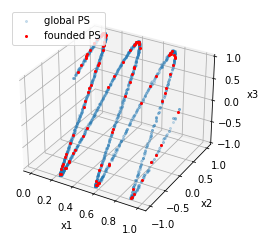

In [54]:
# 绘图
fig = plt.figure()
ax = fig.gca(projection='3d')
random_indices = np.random.randint(0, NDSet.sizes, size=100)
ax.plot(NDSet.Phen[:, 0], NDSet.Phen[:, 1], NDSet.Phen[:, 2], 'o', markersize=2, alpha=0.2, label='global PS')  # 绘制真实数据的图
ax.plot(NDSet.Phen[random_indices, 0], NDSet.Phen[random_indices, 1], NDSet.Phen[random_indices, 2], 'ro', markersize=2, label='founded PS')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.legend(loc='upper left')
plt.savefig('D:/用户/桌面/homework/第二学期/6032/DL MOEA/paper/figures/UF1_PS_sample_graph_1.pdf', dpi=100, bbox_inches='tight')
plt.show()

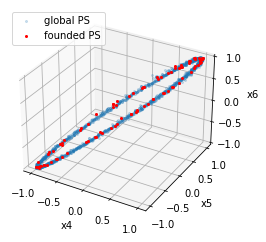

In [53]:
# 绘图
fig = plt.figure()
ax = fig.gca(projection='3d')
random_indices = np.random.randint(0, NDSet.sizes, size=100)
ax.plot(NDSet.Phen[:, 3], NDSet.Phen[:, 4], NDSet.Phen[:, 5], 'o', markersize=2, alpha=0.2, label='global PS')  # 绘制真实数据的图
ax.plot(NDSet.Phen[random_indices, 3], NDSet.Phen[random_indices, 4], NDSet.Phen[random_indices, 5], 'ro', markersize=2, label='founded PS')
ax.set_xlabel('x4')
ax.set_ylabel('x5')
ax.set_zlabel('x6')
plt.legend(loc='upper left')
plt.savefig('D:/用户/桌面/homework/第二学期/6032/DL MOEA/paper/figures/UF1_PS_sample_graph_2.pdf', dpi=100, bbox_inches='tight')
plt.show()

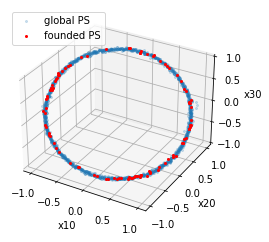

In [52]:
# 绘图
fig = plt.figure()
ax = fig.gca(projection='3d')
random_indices = np.random.randint(0, NDSet.sizes, size=100)
ax.plot(NDSet.Phen[:, 9], NDSet.Phen[:, 19], NDSet.Phen[:, 29], 'o', markersize=2, alpha=0.2, label='global PS')  # 绘制真实数据的图
ax.plot(NDSet.Phen[random_indices, 9], NDSet.Phen[random_indices, 19], NDSet.Phen[random_indices, 29], 'ro', markersize=2, label='founded PS')
ax.set_xlabel('x10')
ax.set_ylabel('x20')
ax.set_zlabel('x30')
plt.legend(loc='upper left')
plt.savefig('D:/用户/桌面/homework/第二学期/6032/DL MOEA/paper/figures/UF1_PS_sample_graph_3.pdf', dpi=100, bbox_inches='tight')
plt.show()